In [1]:
# Import Dependencies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import gmaps
# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)
import requests



In [2]:
url = "https://flightprojectnorthwestern.s3.us-east-2.amazonaws.com/flights_clean.csv"

flight_df = pd.read_csv(url)

flight_df.head()

,Year,Quarter,Origin,State departure,Destination Airport,Airport Group,Ticket Carrier,Total Passengers,Ticket Cost
0,2019,1,CLT,NC,SRQ,CLT:SRQ,AA,3.0,164.5
1,2019,1,SRQ,FL,CLT,SRQ:CLT,AA,3.0,164.5
2,2019,1,CLT,NC,SRQ,CLT:SRQ,AA,3.0,184.5
3,2019,1,SRQ,FL,CLT,SRQ:CLT,AA,3.0,184.5
4,2019,1,CLT,NC,SRQ,CLT:SRQ,AA,5.0,194.5


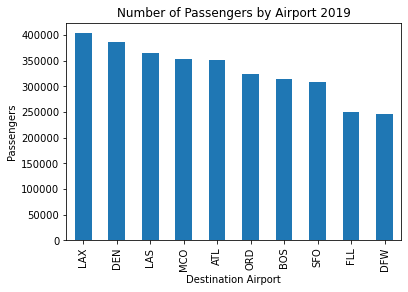

In [3]:
flights2019 = flight_df[flight_df["Year"] == 2019]
destination2019 = flights2019.groupby(["Destination Airport"])["Total Passengers"].sum()
destination2019= destination2019.sort_values(ascending = False)
top2019 =destination2019.nlargest(n=10)
top2019.plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Airport 2019")
plt.savefig("graphs/Number of Passengers by Airport 2019.png")

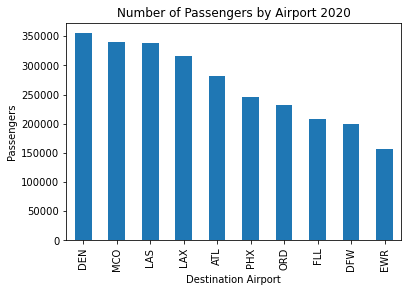

In [4]:
flights2020 = flight_df[flight_df["Year"] == 2020]
destination2020 = flights2020.groupby(["Destination Airport"])["Total Passengers"].sum()
destination2020= destination2020.sort_values(ascending = False)
top2020 = destination2020.nlargest(n=10)
top2020.plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Airport 2020")
plt.savefig("graphs/Number of Passengers by Airport 2020.png")

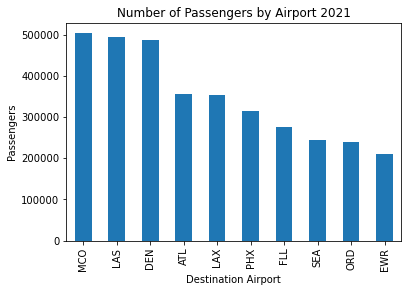

In [5]:
flights2021 = flight_df[flight_df["Year"] == 2021]
destination2021 = flights2021.groupby(["Destination Airport"])["Total Passengers"].sum()
destination2021= destination2021.sort_values(ascending = False)
top2021 = destination2021.nlargest(n=10)
top2021.plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Airport 2021")
plt.savefig("graphs/Number of Passengers by Airport 2021.png")

In [6]:
airports_df = pd.read_csv("Datasets/airport-codes_csv.csv")
# Combine the data into a single dataset
flights_airports2019_df = pd.merge(top2019, airports_df, how="left", on=["Destination Airport", "Destination Airport"])
flights_airports2019_df = flights_airports2019_df.dropna()
# Store latitude and longitude in locations
locations = flights_airports2019_df[["Lat", "Long"]].astype(float)

# Fill NaN values and convert to float
passengers = flights_airports2019_df["Total Passengers"].astype(float)

In [7]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=passengers, 
                                 dissipating=False,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
# Combine the data into a single dataset
flights_airports2020_df = pd.merge(top2020, airports_df, how="left", on=["Destination Airport", "Destination Airport"])

flights_airports2020_df = flights_airports2020_df.dropna()
# Store latitude and longitude in locations
locations2020 = flights_airports2020_df[["Lat", "Long"]].astype(float)

# Fill NaN values and convert to float
passengers2020 = flights_airports2020_df["Total Passengers"].astype(float)

# Plot Heatmap
fig20 = gmaps.figure()

# Create heat layer
heat_layer20 = gmaps.heatmap_layer(locations2020, weights=passengers2020, 
                                 dissipating=False,
                                 point_radius=1)


# Add layer
fig20.add_layer(heat_layer20)

# Display figure
fig20

Figure(layout=FigureLayout(height='420px'))

In [9]:
# Combine the data into a single dataset
flights_airports2021_df = pd.merge(top2021, airports_df, how="left", on=["Destination Airport", "Destination Airport"])

flights_airports2021_df = flights_airports2021_df.dropna()
# Store latitude and longitude in locations
locations2021 = flights_airports2021_df[["Lat", "Long"]].astype(float)

# Fill NaN values and convert to float
passengers2021 = flights_airports2021_df["Total Passengers"].astype(float)

# Plot Heatmap
fig21 = gmaps.figure()

# Create heat layer
heat_layer21 = gmaps.heatmap_layer(locations2021, weights=passengers2021, 
                                 dissipating=False,
                                 point_radius=1)

# Add layer
fig21.add_layer(heat_layer21)

# Display figure
fig21

Figure(layout=FigureLayout(height='420px'))

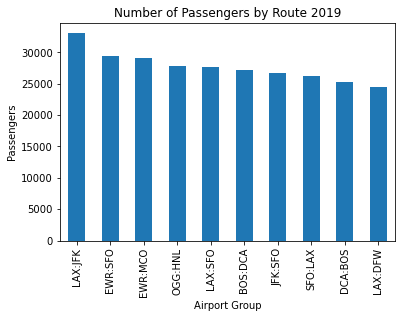

In [32]:
route2019 = flights2019.groupby(["Airport Group"])["Total Passengers"].sum()
route2019 = route2019.sort_values(ascending = False)
route2019.nlargest(n=10).plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Route 2019")
plt.savefig("graphs/Number of Passengers by Route 2019.png")

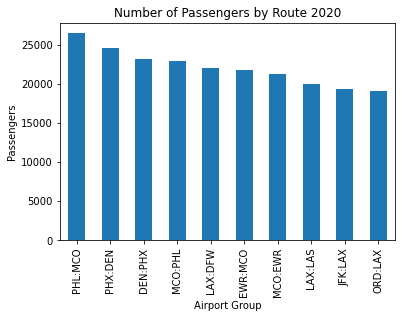

In [33]:
route2020 = flights2020.groupby(["Airport Group"])["Total Passengers"].sum()
route2020 = route2020.sort_values(ascending = False)
route2020.nlargest(n=10).plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Route 2020")
plt.savefig("graphs/Number of Passengers by Route 2020.png")

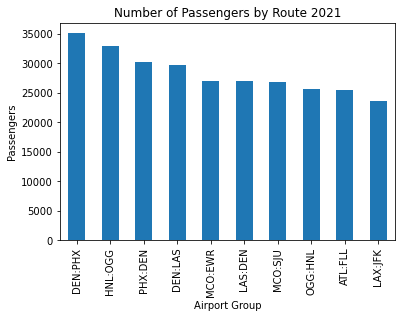

In [34]:
route2021 = flights2021.groupby(["Airport Group"])["Total Passengers"].sum()
route2021 = route2021.sort_values(ascending = False)
route2021.nlargest(n=10).plot(kind="bar",ylabel="Passengers")
plt.title("Number of Passengers by Route 2021")
plt.savefig("graphs/Number of Passengers by Route 2021.png")

In [26]:
topflight2019 = route2019.index[0]
origin2019 = topflight2019[0:3]
destination2019 = topflight2019[4:]
dataorigin = airports_df[airports_df["Destination Airport"]== origin2019]
datadestination = airports_df[airports_df["Destination Airport"]== destination2019]
data = pd.concat([dataorigin,datadestination])
toplocations2019 = data[["Lat", "Long"]].astype(float)
markers = gmaps.marker_layer(toplocations2019)
fig_new = gmaps.figure()
fig_new.add_layer(markers)
fig_new

Figure(layout=FigureLayout(height='420px'))

In [27]:
topflight2020 = route2020.index[0]
origin2020 = topflight2020[0:3]
destination2020 = topflight2020[4:]
dataorigin20 = airports_df[airports_df["Destination Airport"]== origin2020]
datadestination20 = airports_df[airports_df["Destination Airport"]== destination2020]
data20 = pd.concat([dataorigin20,datadestination20])
toplocations2020 = data20[["Lat", "Long"]].astype(float)
markers20 = gmaps.marker_layer(toplocations2020)
fig_new20 = gmaps.figure()
fig_new20.add_layer(markers20)
fig_new20

Figure(layout=FigureLayout(height='420px'))

In [28]:
topflight2021 = route2021.index[0]
origin2021 = topflight2021[0:3]
destination2021 = topflight2021[4:]
dataorigin21 = airports_df[airports_df["Destination Airport"]== origin2021]
datadestination21 = airports_df[airports_df["Destination Airport"]== destination2021]
data21 = pd.concat([dataorigin21,datadestination21])
toplocations2021 = data21[["Lat", "Long"]].astype(float)
markers21 = gmaps.marker_layer(toplocations2021)
fig_new21 = gmaps.figure()
fig_new21.add_layer(markers21)
fig_new21

Figure(layout=FigureLayout(height='420px'))